# Assignment 1
# Francis Kwame Segbe
# University of the Pacific
# Date: March 3, 2024

# Report
The purpose of this study is to provide insights into new account applicant events focusing on potential fraudulent activities. We have utilized the Variant 1 dataset provided, along with detailed data definitions and descriptions. Our analysis employs two distinct methods: Logistic Regression and Random Forest. These methods were chosen due to their interpretability and robustness in handling classification tasks, which aligns with the nature of our analysis.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, average_precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('Variant I.csv')

In [4]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.9,0.990415,11,4,40,0.014640,-0.897718,AC,1853,...,0,200.0,0,INTERNET,6.150317,windows,0,1,0,0
1,0,0.4,0.781728,-1,151,30,0.013269,11.501507,AA,5447,...,0,1500.0,0,INTERNET,4.521952,windows,1,1,0,0
2,0,0.7,0.274290,-1,92,20,0.010669,23.943928,AA,2312,...,0,200.0,0,INTERNET,8.361707,other,1,1,0,0
3,0,0.9,0.722684,-1,55,20,0.021849,48.202774,AA,2413,...,0,1500.0,0,INTERNET,7.339743,other,0,1,0,0
4,0,0.9,0.121661,-1,51,20,0.021491,-1.602116,AB,1227,...,0,1500.0,0,INTERNET,4.338063,other,0,1,0,0


In [6]:
df.shape

(1000000, 32)

# Exploratory Data Analysis

In [4]:
#Checking the summary and statistics
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.560867,4.946516e-01,16.960120,83.585392,31.974200,1.051720e+00,8.715090,1574.468789,5661.914760,...,0.898214,10.799300,0.218157,507.156910,0.025010,7.464706,0.579841,1.016889,0.0,3.288668
std,0.104438,0.290389,2.888474e-01,43.870653,86.458280,10.897167,5.462110e+00,20.210541,1003.700453,3010.869604,...,0.302367,12.121409,0.412995,481.460578,0.156155,7.948670,0.493584,0.175465,0.0,2.209990
min,0.000000,0.100000,5.024707e-08,-1.000000,-1.000000,10.000000,1.373749e-08,-15.739893,1.000000,-174.109691,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,2.268462e-01,-1.000000,18.000000,20.000000,7.150757e-03,-1.180401,893.000000,3431.170414,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.092919,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,4.922199e-01,-1.000000,50.000000,30.000000,1.510390e-02,-0.828224,1270.000000,5299.991908,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.081925,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,7.558383e-01,15.000000,124.000000,40.000000,2.618513e-02,6.215877,1952.000000,7692.312342,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.758878,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,1.000000e+00,399.000000,429.000000,90.000000,7.663502e+01,113.120051,6678.000000,16817.838935,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.567848,1.000000,2.000000,0.0,7.000000


In [5]:
# Checking the information session of our data.
# We can see that, we have non-numeric, data which might possible affect our datasets.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
# Drop non-numeric columns- At this point we dropped all the columns with no numerical values
df = df.select_dtypes(include=['int64', 'float64'])
# Confirm the columns have been dropped
print("Columns have been dropped successfully.")

Columns have been dropped successfully.


In [8]:
# Count missing values
#Some features have more than 25% missing values so we are going to remove those features.
missing_counts = (df < 0).sum()

# Calculate percentage of missing values
total_rows = len(df)
missing_percentage = (missing_counts / total_rows) * 100

print("Percentage of missing values for each feature:")
print(missing_percentage)

Percentage of missing values for each feature:
fraud_bool                           0.0000
income                               0.0000
name_email_similarity                0.0000
prev_address_months_count           70.4367
current_address_months_count         0.4442
customer_age                         0.0000
days_since_request                   0.0000
intended_balcon_amount              73.9988
zip_count_4w                         0.0000
velocity_6h                          0.0036
velocity_24h                         0.0000
velocity_4w                          0.0000
bank_branch_count_8w                 0.0000
date_of_birth_distinct_emails_4w     0.0000
credit_risk_score                    1.5021
email_is_free                        0.0000
phone_home_valid                     0.0000
phone_mobile_valid                   0.0000
bank_months_count                   25.4905
has_other_cards                      0.0000
proposed_credit_limit                0.0000
foreign_request              

In [9]:
# Select specific columns
specific_columns = ['device_distinct_emails_8w', 'session_length_in_minutes', 'bank_months_count',
                    'intended_balcon_amount', 'prev_address_months_count', 'current_address_months_count']
subset_df = df[specific_columns]

# Count missing values
missing_counts = (subset_df < 0).sum()

# Calculate percentage of missing values
total_rows = len(subset_df)
missing_percentage = (missing_counts / total_rows) * 100

print("Percentage of missing values for each feature:")
print(missing_percentage)

Percentage of missing values for each feature:
device_distinct_emails_8w        0.0318
session_length_in_minutes        0.1842
bank_months_count               25.4905
intended_balcon_amount          73.9988
prev_address_months_count       70.4367
current_address_months_count     0.4442
dtype: float64


In [10]:
#Since our documentation says anything that fall under '-1' is a missing value, we will, 

In [11]:
# List of columns to drop
columns_to_drop = ['bank_months_count', 'intended_balcon_amount', 'prev_address_months_count']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Confirm the columns have been dropped
print("Columns have been dropped successfully.")

Columns have been dropped successfully.


In [12]:
# Here, we are checking our data with again for confirmation.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   current_address_months_count      1000000 non-null  int64  
 4   customer_age                      1000000 non-null  int64  
 5   days_since_request                1000000 non-null  float64
 6   zip_count_4w                      1000000 non-null  int64  
 7   velocity_6h                       1000000 non-null  float64
 8   velocity_24h                      1000000 non-null  float64
 9   velocity_4w                       1000000 non-null  float64
 10  bank_branch_count_8w              1000000 non-null  int64  
 11  date_of_birth_distinct_emails_4w  1000

In [13]:
# Count the number of fraudulent events
fraudulent_count = df['fraud_bool'].sum()

# Calculate the total number of events
total_events = len(df)

# Calculate the percentage of fraudulent events
percentage_fraudulent = (fraudulent_count / total_events) * 100

# Print the percentage of fraudulent events
print("Percentage of fraudulent events:", percentage_fraudulent)

Percentage of fraudulent events: 1.1029


In [14]:
# We checking the null values in the dataset. Our visualizations says we do not have null values. So next we check the documentation.
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
email_is_free                       0
phone_home_valid                    0
phone_mobile_valid                  0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
session_length_in_minutes           0
keep_alive_session                  0
device_distinct_emails_8w           0
device_fraud_count                  0
month                               0
dtype: int64

In [15]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

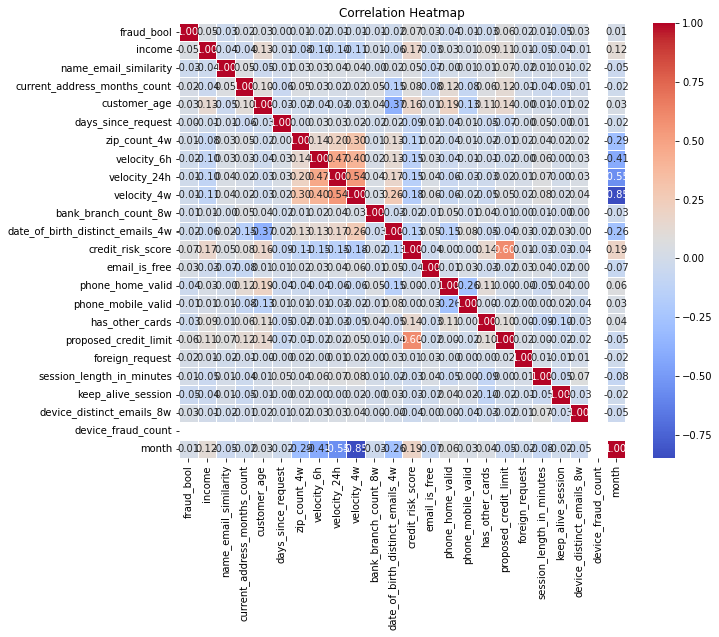

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

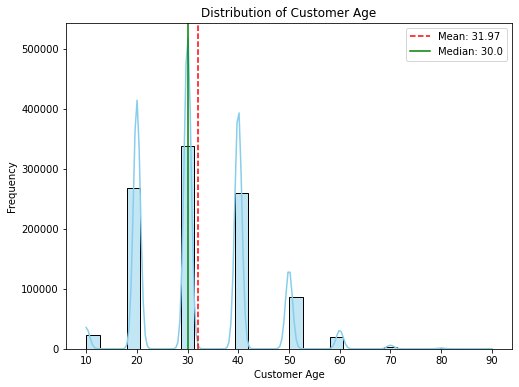

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram of customer ages
sns.histplot(df['customer_age'], bins=30, kde=True, ax=ax, color='skyblue')

# Add labels and title
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Age')

# Add mean and median lines
mean_age = df['customer_age'].mean()
median_age = df['customer_age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age}')

# Add legend
plt.legend()

# Show plot
plt.show()

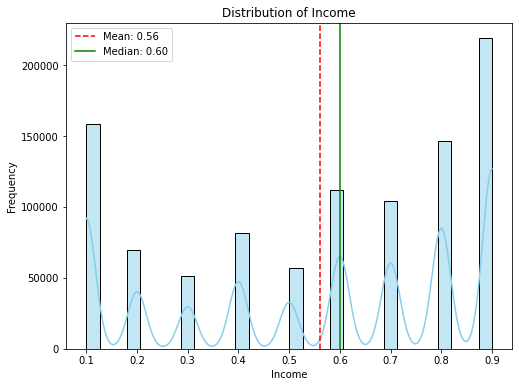

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a histogram of income
sns.histplot(df['income'], bins=30, kde=True, ax=ax, color='skyblue')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

# Add mean and median lines
mean_income = df['income'].mean()
median_income = df['income'].median()
plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean: {mean_income:.2f}')
plt.axvline(median_income, color='green', linestyle='-', label=f'Median: {median_income:.2f}')

# Add legend
plt.legend()

# Show plot
plt.show()

In [19]:
# Histogram of Income for Fraudulent vs. Non-Fraudulent Applicants

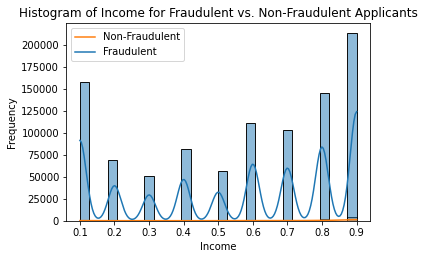

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='income', hue='fraud_bool', bins=30, kde=True)
plt.title('Histogram of Income for Fraudulent vs. Non-Fraudulent Applicants')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend(['Non-Fraudulent', 'Fraudulent'])

([<matplotlib.axis.XTick at 0x2913bfe4730>,
 [Text(0, 0, 'Non-Fraudulent'), Text(1, 0, 'Fraudulent')])

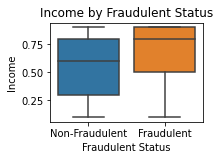

In [21]:
# Box Plot: Income by Fraudulent Status
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='fraud_bool', y='income')
plt.title('Income by Fraudulent Status')
plt.xlabel('Fraudulent Status')
plt.ylabel('Income')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

In [22]:
# Drop non-numeric columns
numeric_df = df

In [23]:
# Split data
X = numeric_df.drop('fraud_bool', axis=1)
y = df['fraud_bool']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Standardization  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# PCA
pca = PCA(n_components=4)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

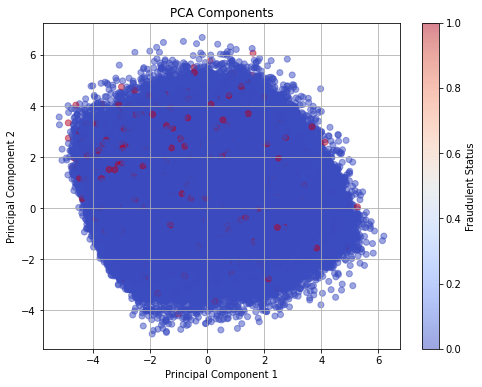

In [26]:
# Visualize PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Fraudulent Status')
plt.grid(True)
plt.show()

In [27]:
# Access PCA components and explained variance ratios
components = pca.components_
explained_variance_ratios = pca.explained_variance_ratio_

# Create DataFrame to display components and explained variance ratios
pca_df = pd.DataFrame(components, columns=X.columns)
pca_df.index = [f'PC{i+1}' for i in range(len(pca_df))]
pca_df['Explained Variance Ratio'] = explained_variance_ratios

# Display DataFrame
print(pca_df)

       income  name_email_similarity  current_address_months_count  \
PC1 -0.142528               0.032591                     -0.024870   
PC2  0.144005               0.085117                      0.291266   
PC3 -0.133524              -0.121306                      0.159807   
PC4  0.265565              -0.353675                     -0.299653   

     customer_age  days_since_request  zip_count_4w  velocity_6h  \
PC1     -0.121029            0.043178      0.243260     0.349053   
PC2      0.384952           -0.129873      0.068930     0.116586   
PC3      0.291779            0.060581      0.011474     0.044909   
PC4      0.269720            0.235519     -0.074381     0.004763   

     velocity_24h  velocity_4w  bank_branch_count_8w  ...  phone_mobile_valid  \
PC1      0.413191     0.481127              0.014705  ...            0.011141   
PC2      0.161788     0.183892              0.090184  ...           -0.189788   
PC3      0.025619    -0.012702              0.132616  ...        

In [28]:
# Separate majority and minority classes
majority_class = df[df['fraud_bool'] == 0]
minority_class = df[df['fraud_bool'] == 1]

# Downsample majority class to match minority class
majority_downsampled = resample(majority_class,
                                 replace=False,  # sample without replacement
                                 n_samples=len(minority_class),  # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
undersampled_df = pd.concat([majority_downsampled, minority_class])

# Shuffle the dataframe to mix up the order of samples
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

# Check the class distribution
print(undersampled_df['fraud_bool'].value_counts())

1    11029
0    11029
Name: fraud_bool, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = undersampled_df.drop('fraud_bool', axis=1)  # Assuming 'fraud_bool' is the target variable
y = undersampled_df['fraud_bool']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6271532184950136
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      2221
           1       0.63      0.61      0.62      2191

    accuracy                           0.63      4412
   macro avg       0.63      0.63      0.63      4412
weighted avg       0.63      0.63      0.63      4412

Confusion Matrix:
[[1424  797]
 [ 848 1343]]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC Score: 0.6718779765201304


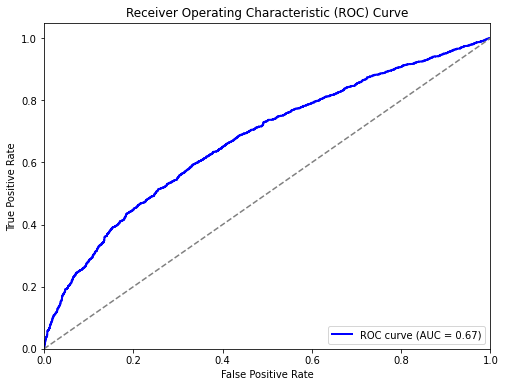

In [30]:
# Get predicted probabilities for the positive class
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()